In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from IPython.display import display, clear_output

## First we define the mathematical and numerical parameters for the figure.

In [5]:
# Define the mathematical parameters for the problem
f = lambda t, y: 0.9*y # dydt = f(t,y)
t0 = 0
y0 = 0.15

# Numerical parameters
dt = 1
endtime = 3*dt # do 3 time steps

## Next plot the vector field and the exact solution on top of it.

<IPython.core.display.Javascript object>


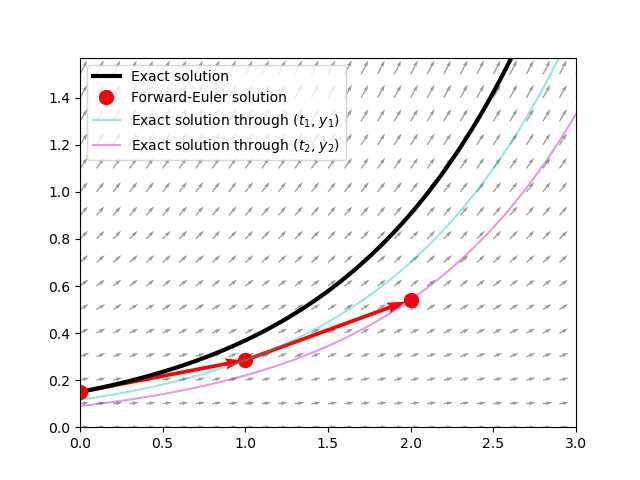

In [6]:
# Create mesh for quiver plot
dtquiv = 0.1 # time step for quiver plot
tv = np.arange(0, endtime+dtquiv, dtquiv)
yv = np.arange(0, np.pi/2+dtquiv, dtquiv)
tgrid, ygrid = np.meshgrid(tv, yv) 
graycolor = 0.6*np.ones(3)
fig1, ax1 = plt.subplots()
ax1.quiver(tgrid, ygrid, 0*tgrid+1, f(tgrid, ygrid), 
           linewidth=1.5, color=graycolor, units='width', angles='xy')
ax1.set_xlim([0, endtime])
ax1.set_ylim([0, np.pi/2])

tfine = np.linspace(t0, endtime, 100) # Create a new time on a finer scale for finding the numerical solution
sol = scipy.integrate.solve_ivp(f, [t0, endtime], [y0], rtol=1e-8, t_eval = tfine) # We consider this the "exact" solution,
                                                    # but it is not exact because it comes from a
                                                    # numerical method
tsol = sol.t # get the t values from the integration
ysol_true = sol.y # get the y values from the integration
sol_plot, = ax1.plot(tsol, ysol_true[0], 'k', linewidth = 3, 
                    label='Exact solution')
ax1.legend(handles=[sol_plot])

## Define the numerical solution at (t0, y0)

<IPython.core.display.Javascript object>


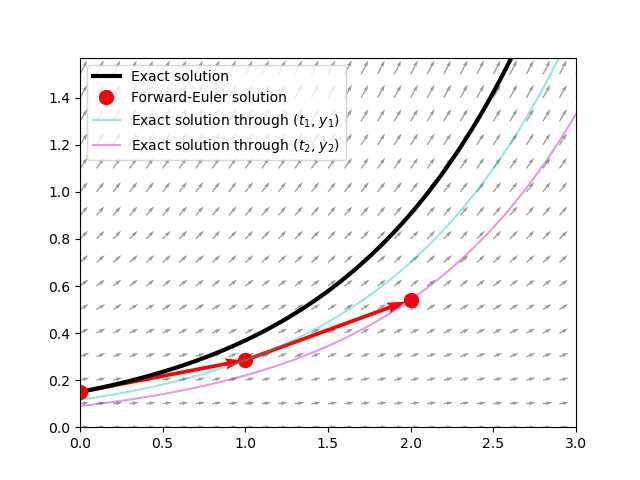

In [7]:
t0y0, = ax1.plot(t0, y0, '.r', markersize=20, label='Forward-Euler solution')
ax1.legend(handles = [sol_plot, t0y0])
display(fig1)

## Find the next point from Forward Euler

<IPython.core.display.Javascript object>


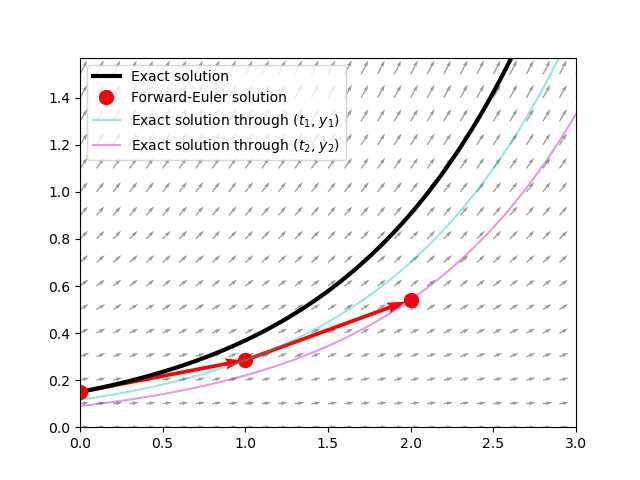

In [8]:
# Create an arrow from (t0, y0) along the vector field defined by the ODE
q0 = ax1.quiver([t0], [y0], [dt], [f(t0, y0)], color='r', linewidth=1.5, units='width', angles='xy', scale=endtime/dt)
display(fig1)

## Plot (t1, y1)

<IPython.core.display.Javascript object>


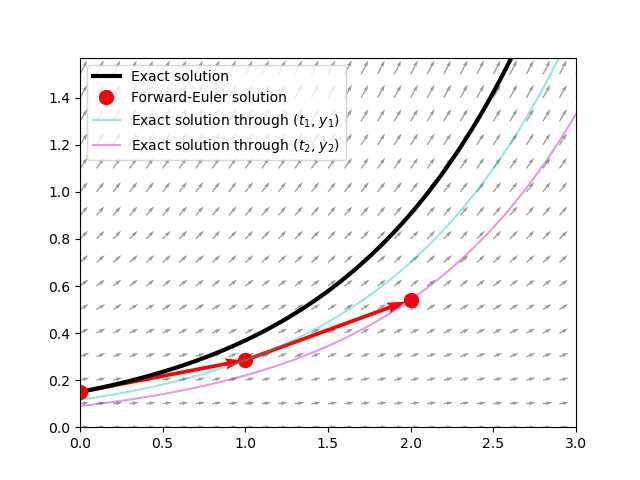

In [9]:
t1 = t0+dt
y1 = y0 + dt*f(t0, y0) # FE step
ax1.plot(t1, y1, '.r', markersize=20)
display(fig1)

## Plot the solution curve that goes through y_1

<IPython.core.display.Javascript object>


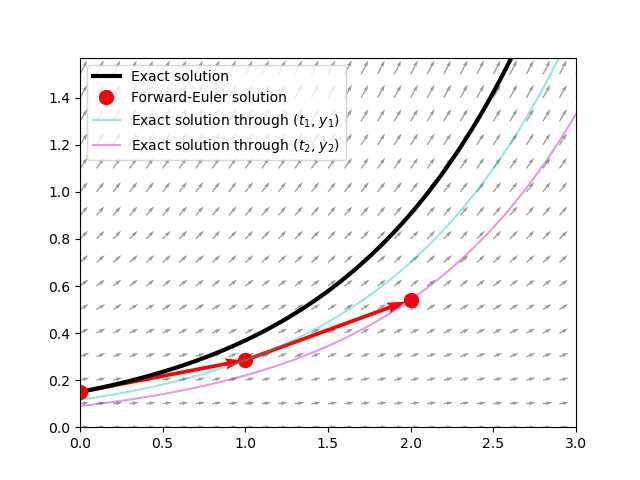

In [10]:
# To do this, we need to integrate forward in time and backward in time.
# First we do forward from (t_1, y_1) to the end, then we do backward from
# (t_1, y_1) back to t_0. 
new_tfine = np.linspace(t0+dt, endtime)
sol = scipy.integrate.solve_ivp(f, [t1, endtime], [y1], t_eval = new_tfine)
tsol = sol.t; ysol = sol.y;
t1y1sol_plota, = ax1.plot(tsol, ysol[0], 'c', alpha=0.4)
new_tfine = np.linspace(t0+dt, t0)
sol = scipy.integrate.solve_ivp(f, [t1, t0], [y1], t_eval = new_tfine)
tsol = sol.t; ysol = sol.y;
t1y1sol_plotb, = ax1.plot(tsol, ysol[0], 'c', alpha=0.4, label=r'Exact solution through ($t_1$, $y_1$)')
ax1.legend(handles = [sol_plot, t0y0, t1y1sol_plotb], loc='upper left')
display(fig1)

## Plot the vector field at (t_1, y_1)

<IPython.core.display.Javascript object>


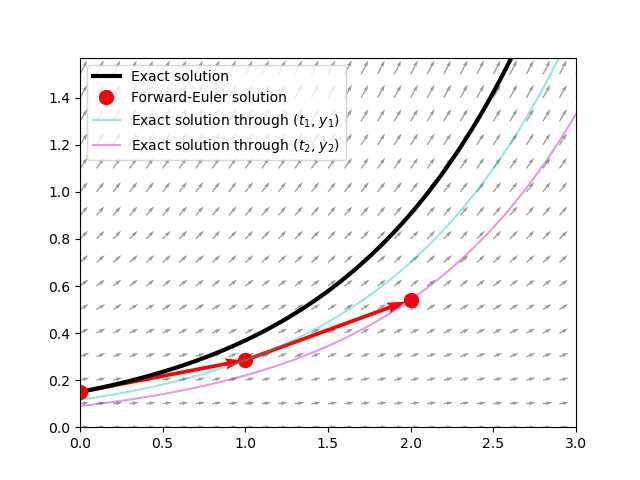

In [11]:
q1 = ax1.quiver(t1, y1, dt, f(t1, y1), color='r', linewidth=1.5, angles='xy', scale=endtime/dt)
display(fig1)

## This gives y_2

<IPython.core.display.Javascript object>


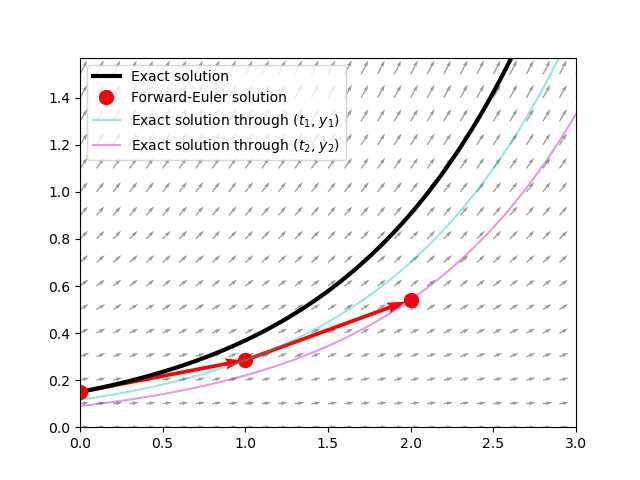

In [12]:
t2 = t1+dt; y2 = y1+dt*f(t1, y1)
ax1.plot(t2, y2, '.r', markersize=20)
display(fig1)

## Find and plot solution curve going through (t_2, y_2)

<IPython.core.display.Javascript object>


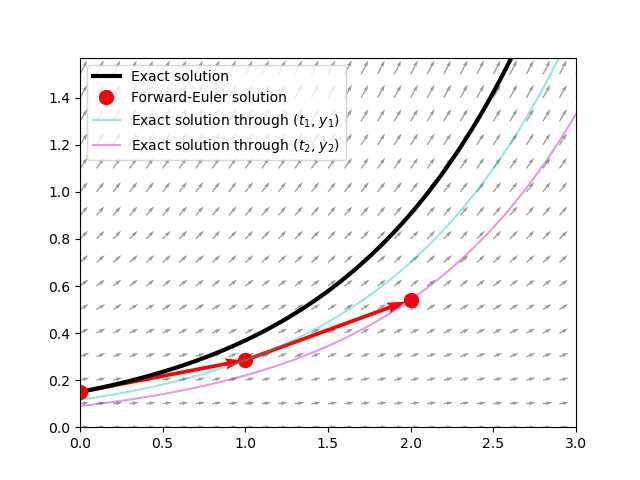

In [13]:
new_tfine = np.linspace(t2, endtime)
sol = scipy.integrate.solve_ivp(f, [t2, endtime], [y2], t_eval = new_tfine)
tsol = sol.t; ysol = sol.y;
t2y2sol_plota, = ax1.plot(tsol, ysol[0], 'm', alpha=0.4)
new_tfine = np.linspace(t2, t0)
sol = scipy.integrate.solve_ivp(f, [t2, t0], [y2], t_eval = new_tfine)
tsol = sol.t; ysol = sol.y;
t2y2sol_plotb, = ax1.plot(tsol, ysol[0], 'm', alpha=0.4, label=r'Exact solution through ($t_2$, $y_2$)')
ax1.legend(handles = [sol_plot, t0y0, t1y1sol_plotb, t2y2sol_plotb], loc='upper left')
display(fig1)

## Do it all together for y_3

<IPython.core.display.Javascript object>


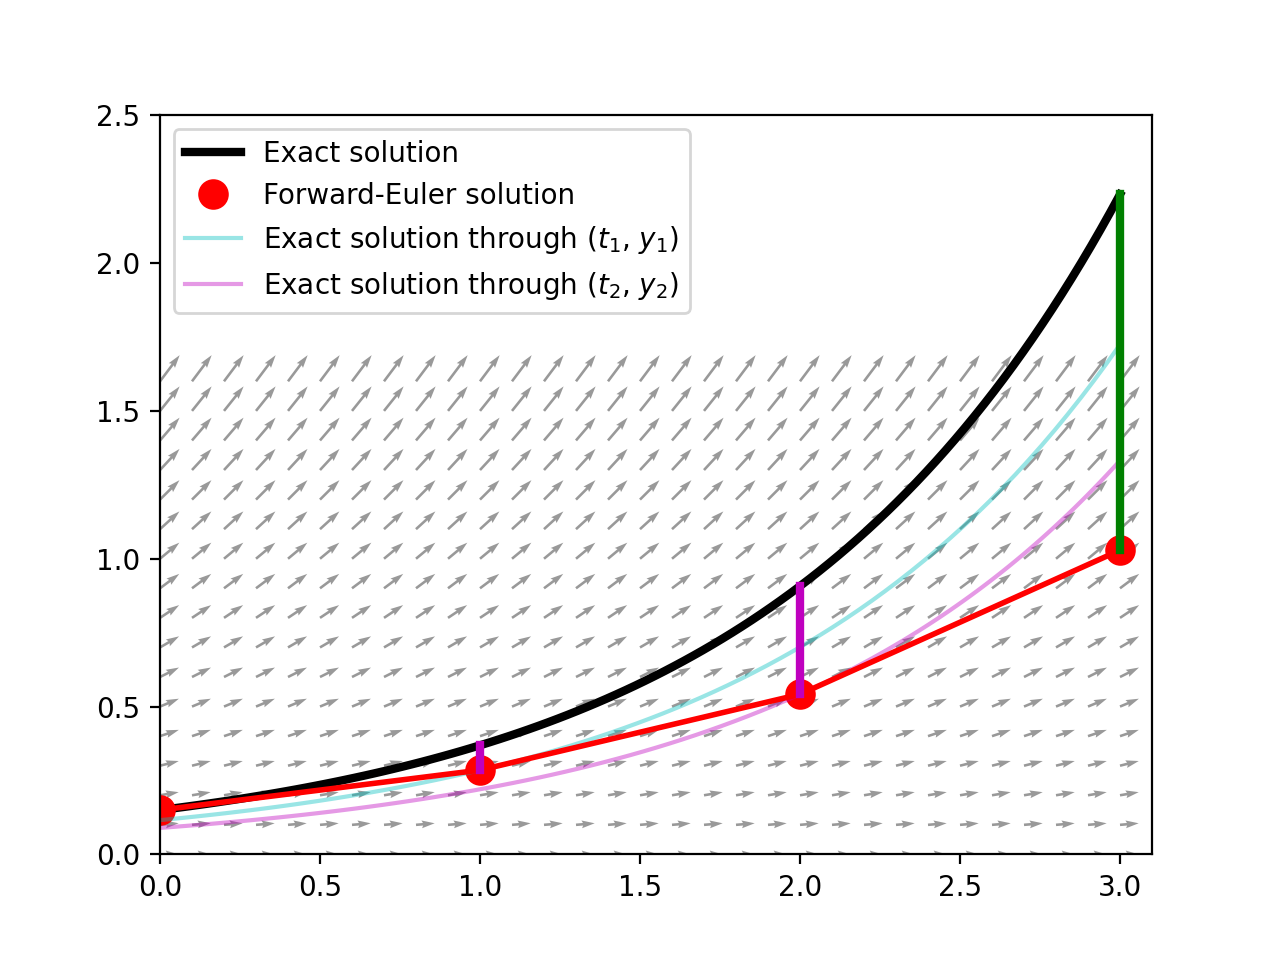

In [11]:
q2 = ax1.quiver(t2, y2, dt, f(t2, y2), color='r', linewidth=1.5, scale=endtime/dt, angles='xy')
t3 = t2+dt; y3 = y2+dt*f(t2, y2)
ax1.plot(t3, y3, '.r', markersize=20)

display(fig1)

## Clear the quivers and draw the FE solution

<IPython.core.display.Javascript object>


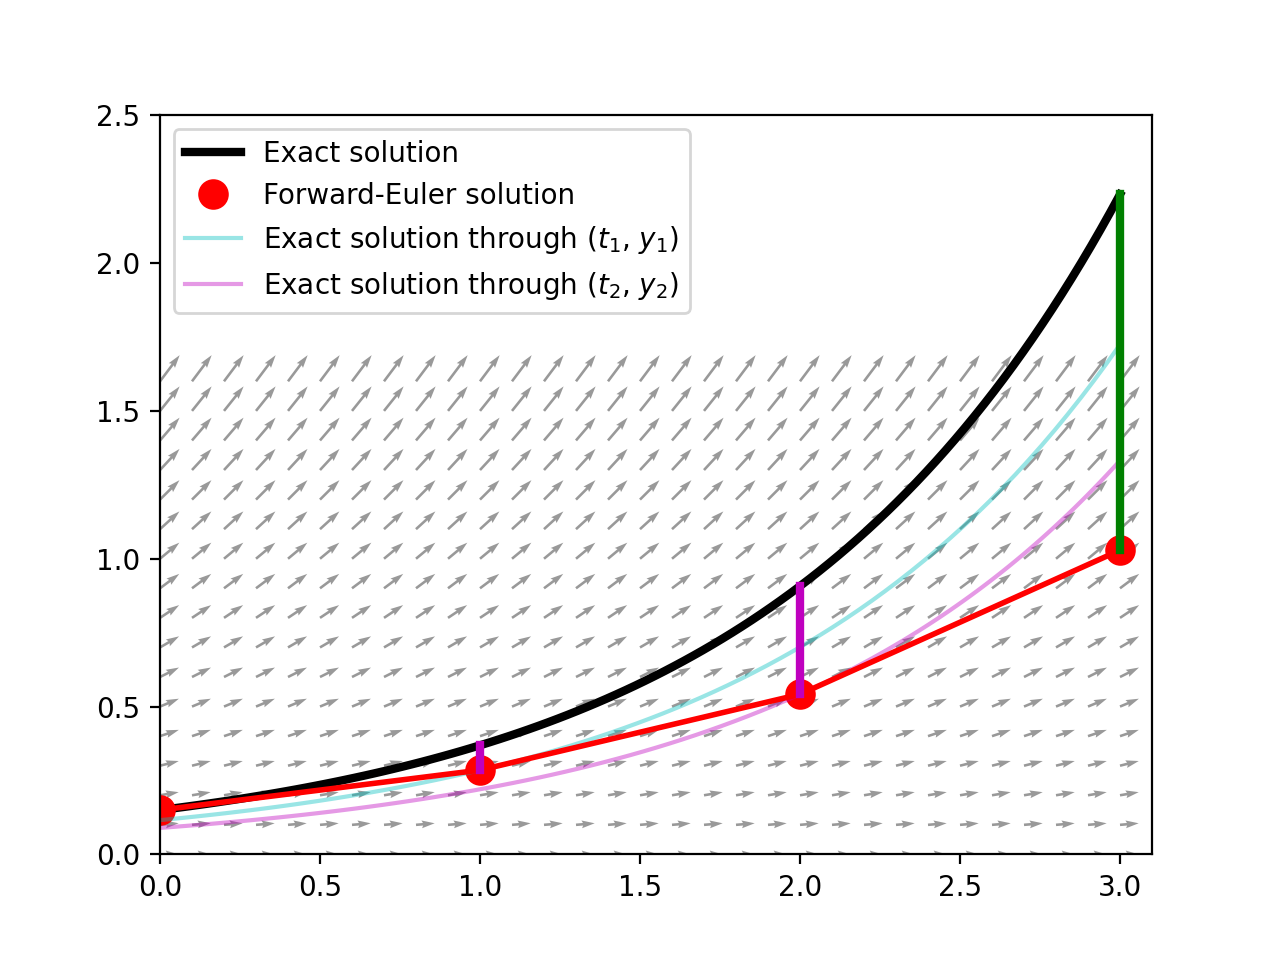

In [12]:
q0.remove()
q1.remove()
q2.remove()

ax1.plot([t0, t1, t2, t3], [y0, y1, y2, y3], 'r', linewidth=2)
display(fig1)

## Plot local errors for each of the values of y_n we calculated

/Users/jeremyupsal/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


<IPython.core.display.Javascript object>


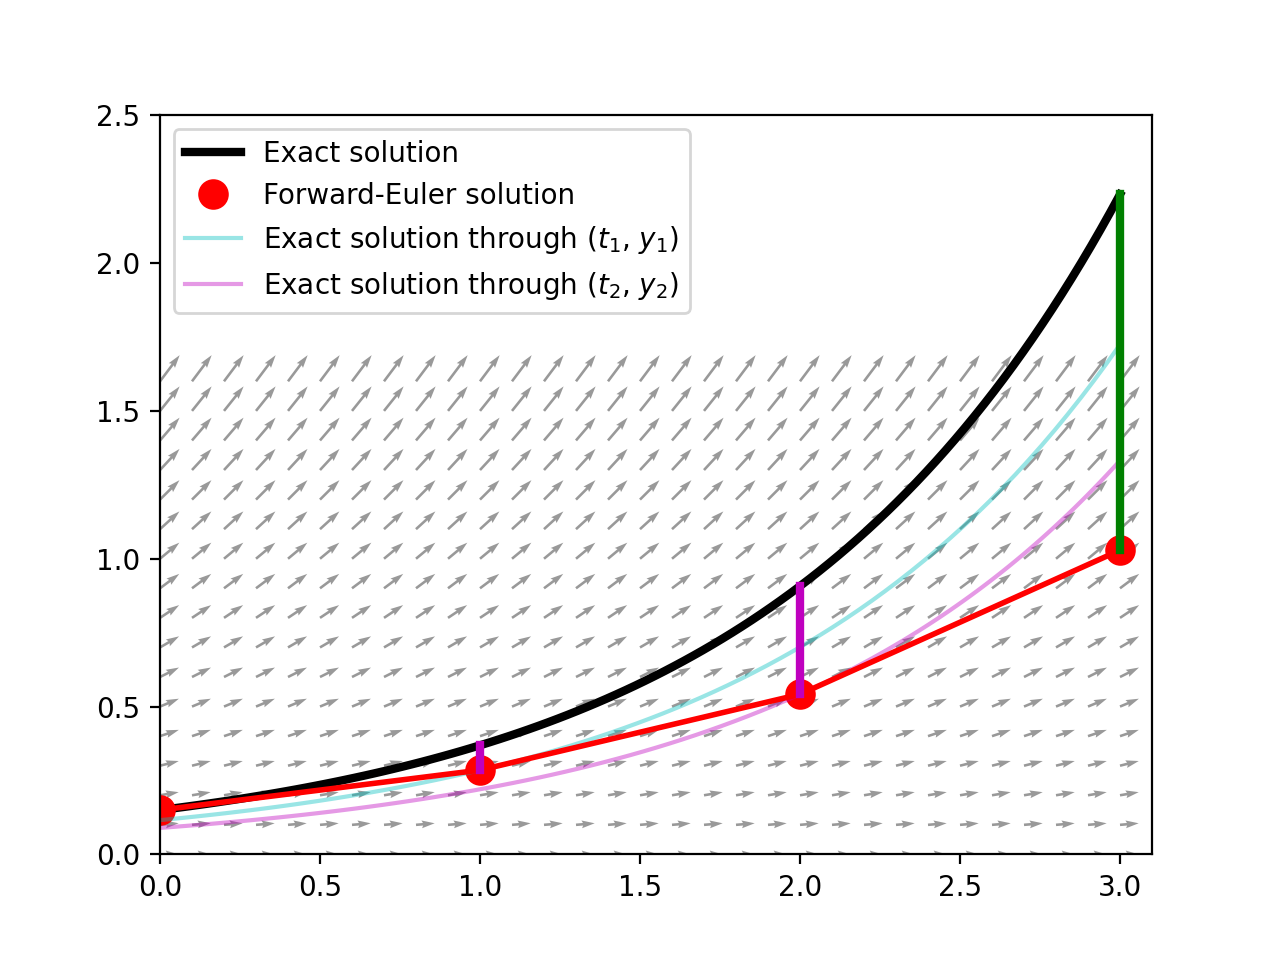

In [13]:
t1_ind = np.where(tfine==t1)[0] # Find the index corresponding to t1
ax1.plot([t1, t1], [ysol_true[0][t1_ind], y1], 'm', linewidth=3)

t2_ind = np.where(tfine==t2)[0] # Find the index corresponding to t1
ax1.plot([t2, t2], [ysol_true[0][t2_ind], y2], 'm', linewidth=3)

## Finally plot the global error, which is the error at the end of the calculation
ax1.plot([endtime, endtime], [ysol_true[0][-1], y3], 'g', linewidth=3)
ax1.set_ylim([0, 2.5])
ax1.set_xlim([0, 3.1])

display(fig1)